## Logistic Regression from scratch

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score, confusion_matrix

### Sigmoid function
$$\sigma(z) = \frac{1}{1+e^{-z}}$$

In [3]:
def sigmoid(z):
    
    return 1.0/(1.0 + np.exp(-z))

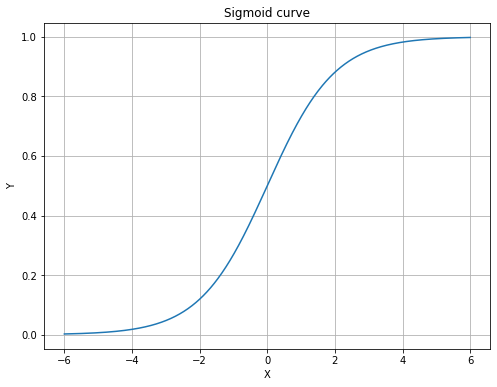

In [4]:
linspace = np.linspace(-6, 6, num = 1000)

plt.figure(figsize=(8,6))
plt.title("Sigmoid curve")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.plot(linspace, sigmoid(linspace));

### Linear Regression equation
$$\bar{y} = w\cdot x + b$$
where,  
$\bar{y}$ - estimated value, prediction  
$x$ - input data matrix  
$w$ - weights  
$b$ - bias

### Hypothesis
$$\bar{y} = \frac{1}{1+e^{-(w\cdot x+b)}}$$

### Cost function
$$J(w,b) =-\frac{1}{m}\sum^{m}_{i=1}\Big(y^{(i)}\log\big(\bar{y}\ ^{(i)}\big)+\big(1-y^{(i)}\big)\log\big(1-\bar{y}\ ^{(i)}\big)\Big)$$

In [5]:
def loss(y_true, y_pred):
    
    return -np.mean(y_true*(np.log(y_pred)) - (1-y_true)*np.log(1-y_pred))

#### Partial derivatives of cost function
$$\frac{\partial}{\partial w}J(w,b)=\frac{1}{m}(\bar{y}-y)x^T$$

$$\frac{\partial}{\partial b}J(w,b)=\frac{1}{m}(\bar{y}-y)$$

### Gradient Descent
$$w:=w-lr\cdot\frac{\partial}{\partial w}J(w,b)$$

$$b:=b-lr\cdot\frac{\partial}{\partial b}J(w,b)$$

### Putting it all together

In [6]:
class LogisticRegression:
    
    def __init__(self, X, y):
        # number of samples, number of features
        self.m, self.n = X.shape
        
        # weight initialization
        self.W = np.zeros(self.n)
        self.b = 0
        
        # data initialization
        self.X = X
        self.y = y
        print("Model has been initialized.")


    def sigmoid(self, X):
        z = np.dot(X, self.W) + self.b
        return 1.0/(1.0 + np.exp(-z))
    
    
    def gradient_descent(self, lr):
        # calculate gradients
        tmp = self.sigmoid(self.X) - self.y.T
        tmp = np.reshape(tmp, self.m)
        
        dW = np.dot(self.X.T, tmp) / self.m
        db = np.sum(tmp) / self.m
        
        # update weights
        self.W = self.W - lr * dW
        self.b = self.b - lr * db
        
        return self
    
    
    def predict(self, X):
        value = self.sigmoid(X)
        predictions = np.where(value > 0.5, 1, 0)
        
        return predictions
    
    
    def accuracy(self, predictions):
        correct = 0
        
        for i in range(len(self.y)):
            if self.y[i] == predictions[i]:
                correct += 1
        
        return correct / float(len(y)) * 100.0

        
    def fit(self, epochs, lr):
        # model fitting
        for _ in range(epochs):
            self.gradient_descent(lr)
            y_pred = self.predict(self.X)
            accuracy_score = round(self.accuracy(y_pred), 2)
            
            print(f" Epoch {_}/{epochs} -  accuracy: {accuracy_score}")
        
        print("Model has beed fitted.")
        
        return self

### Data

In [7]:
X, y = make_moons(n_samples=1000, noise=0.3)
X_test, y_test = make_moons(n_samples=200, noise=0.3)

#### Plot of generated data

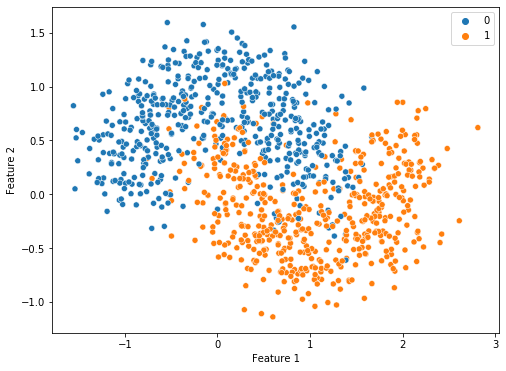

In [8]:
plt.figure(figsize=(8,6))
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y);

In [9]:
model = LogisticRegression(X, y)

model.fit(epochs=100, lr=0.1)

Model has been initialized.
 Epoch 0/100 -  accuracy: 78.5
 Epoch 1/100 -  accuracy: 78.5
 Epoch 2/100 -  accuracy: 78.5
 Epoch 3/100 -  accuracy: 78.5
 Epoch 4/100 -  accuracy: 78.6
 Epoch 5/100 -  accuracy: 78.6
 Epoch 6/100 -  accuracy: 78.6
 Epoch 7/100 -  accuracy: 78.9
 Epoch 8/100 -  accuracy: 79.0
 Epoch 9/100 -  accuracy: 79.1
 Epoch 10/100 -  accuracy: 79.2
 Epoch 11/100 -  accuracy: 79.2
 Epoch 12/100 -  accuracy: 79.3
 Epoch 13/100 -  accuracy: 79.6
 Epoch 14/100 -  accuracy: 79.7
 Epoch 15/100 -  accuracy: 79.5
 Epoch 16/100 -  accuracy: 79.7
 Epoch 17/100 -  accuracy: 79.6
 Epoch 18/100 -  accuracy: 79.8
 Epoch 19/100 -  accuracy: 79.8
 Epoch 20/100 -  accuracy: 79.9
 Epoch 21/100 -  accuracy: 80.0
 Epoch 22/100 -  accuracy: 80.0
 Epoch 23/100 -  accuracy: 80.1
 Epoch 24/100 -  accuracy: 80.3
 Epoch 25/100 -  accuracy: 80.4
 Epoch 26/100 -  accuracy: 80.6
 Epoch 27/100 -  accuracy: 80.6
 Epoch 28/100 -  accuracy: 80.6
 Epoch 29/100 -  accuracy: 80.6
 Epoch 30/100 -  accur

In [10]:
accuracy = accuracy_score(y_test, model.predict(X_test))

print(f"Accuracy for validation dataset:\n {accuracy}")

Accuracy for validation dataset:
 0.825


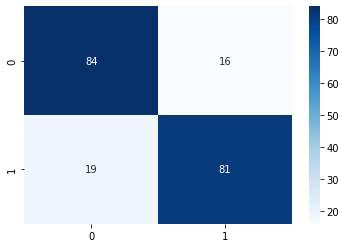

In [13]:
conf_matrix = confusion_matrix(y_test, model.predict(X_test))
sns.heatmap(conf_matrix, annot=True, cmap="Blues");